# Project 1

Project description: 
- Read data into Jupyter notebook, use pandas to import data into a data frame
- preprocess data: explore data, address missing data, categorical data, if there is any, and data scaling. Justify the type of scaling used in this project. 
- train your dataset using all the linear regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best repressor for this dataset and train your model on the entire dataset using the best parameters and predict the market price for the test_set.
- submit IPython notebook. Use markdown to provide an inline report for this project.

##### <font color = 'red'> Important note: All the group members should participate in completing this project.  This includes coding, preparing report and testing the models. 

# Read data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('bitcoin_dataset.csv')
test = pd.read_csv('test_set.csv')

# Checking the data
We concluded that there is no cartegorical data in the data set.

In [2]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [3]:
data.shape

(2906, 24)

In [4]:
data.columns

Index(['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
Date                                                   2906 non-null object
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2879 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2885 non-null float64
btc_blocks_size                                        2877 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null int64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2894 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                                   

In [6]:
data.dtypes

Date                                                    object
btc_market_price                                       float64
btc_total_bitcoins                                     float64
btc_market_cap                                         float64
btc_trade_volume                                       float64
btc_blocks_size                                        float64
btc_avg_block_size                                     float64
btc_n_orphaned_blocks                                    int64
btc_n_transactions_per_block                           float64
btc_median_confirmation_time                           float64
btc_hash_rate                                          float64
btc_difficulty                                         float64
btc_miners_revenue                                     float64
btc_transaction_fees                                   float64
btc_cost_per_transaction_percent                       float64
btc_cost_per_transaction                               

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 23 columns):
Date                                                   14 non-null object
btc_total_bitcoins                                     14 non-null float64
btc_market_cap                                         14 non-null float64
btc_trade_volume                                       14 non-null float64
btc_blocks_size                                        14 non-null float64
btc_avg_block_size                                     14 non-null float64
btc_n_orphaned_blocks                                  14 non-null int64
btc_n_transactions_per_block                           14 non-null float64
btc_median_confirmation_time                           14 non-null float64
btc_hash_rate                                          14 non-null float64
btc_difficulty                                         14 non-null float64
btc_miners_revenue                                     14 non-null float64


In [8]:
data.describe

<bound method NDFrame.describe of                 Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0     2/17/2010 0:00           0.00000           2043200.0    0.000000e+00   
1     2/18/2010 0:00           0.00000           2054650.0    0.000000e+00   
2     2/19/2010 0:00           0.00000           2063600.0    0.000000e+00   
3     2/20/2010 0:00           0.00000           2074700.0    0.000000e+00   
4     2/21/2010 0:00           0.00000           2085400.0    0.000000e+00   
5     2/22/2010 0:00           0.00000           2098150.0    0.000000e+00   
6     2/23/2010 0:00           0.00000           2110700.0    0.000000e+00   
7     2/24/2010 0:00           0.00000           2120200.0    0.000000e+00   
8     2/25/2010 0:00           0.00000           2127600.0    0.000000e+00   
9     2/26/2010 0:00           0.00000           2136100.0    0.000000e+00   
10    2/27/2010 0:00           0.00000           2144750.0    0.000000e+00   
11    2/28/2010 0:00          

In [9]:
test.describe

<bound method NDFrame.describe of               Date  btc_total_bitcoins  btc_market_cap  btc_trade_volume  \
0    2/1/2018 0:00          16839687.5    1.529590e+11      1.509688e+09   
1    2/2/2018 0:00          16841787.5    1.499240e+11      2.213437e+09   
2    2/3/2018 0:00          16843762.5    1.528850e+11      9.524038e+08   
3    2/4/2018 0:00          16845987.5    1.415170e+11      1.080683e+09   
4    2/5/2018 0:00          16848300.0    1.152220e+11      1.793319e+09   
5    2/6/2018 0:00          16850425.0    1.295060e+11      3.094258e+09   
6    2/7/2018 0:00          16852187.5    1.365020e+11      1.670288e+09   
7    2/8/2018 0:00          16853825.0    1.388850e+11      1.336662e+09   
8    2/9/2018 0:00          16855512.5    1.438710e+11      1.093135e+09   
9   2/10/2018 0:00          16857300.0    1.402510e+11      9.185402e+08   
10  2/11/2018 0:00          16859187.5    1.406640e+11      7.963917e+08   
11  2/12/2018 0:00          16861262.5    1.485700e+11

# Assign the target variable, input variables
Drop Date and Market price for input variables and use Market price for the target variable

In [51]:
X = data.drop(['Date', 'btc_market_price'], axis = 1)
y = data['btc_market_price']

In [52]:
X.dtypes

btc_total_bitcoins                                     float64
btc_market_cap                                         float64
btc_trade_volume                                       float64
btc_blocks_size                                        float64
btc_avg_block_size                                     float64
btc_n_orphaned_blocks                                    int64
btc_n_transactions_per_block                           float64
btc_median_confirmation_time                           float64
btc_hash_rate                                          float64
btc_difficulty                                         float64
btc_miners_revenue                                     float64
btc_transaction_fees                                   float64
btc_cost_per_transaction_percent                       float64
btc_cost_per_transaction                               float64
btc_n_unique_addresses                                   int64
btc_n_transactions                                     

In [53]:
y.dtypes

dtype('float64')

#### Confirm the trend of data putting x as time and y as price using plot

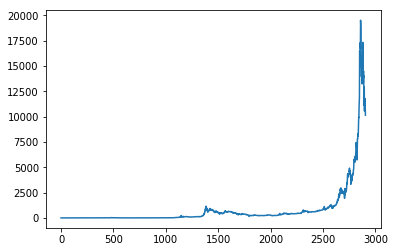

In [54]:
import matplotlib.pyplot as plt
plt.plot(X.index,y)
plt.show()

# Check Missing Data
We found out that there are missing data in the data set

In [55]:
np.isnan(X).any()

btc_total_bitcoins                                      True
btc_market_cap                                         False
btc_trade_volume                                        True
btc_blocks_size                                         True
btc_avg_block_size                                     False
btc_n_orphaned_blocks                                  False
btc_n_transactions_per_block                           False
btc_median_confirmation_time                            True
btc_hash_rate                                          False
btc_difficulty                                          True
btc_miners_revenue                                     False
btc_transaction_fees                                    True
btc_cost_per_transaction_percent                       False
btc_cost_per_transaction                               False
btc_n_unique_addresses                                 False
btc_n_transactions                                     False
btc_n_transactions_total

In [56]:
np.isnan(y).any()

False

# Filling the missing data
### Using the pad method to fill in the data
#### It will be filling the missing data with privious row's value if privious row is not null value
#### In this dataset, this is better way to fill the null value since if we put mean as null value, it will give us less accurate models.

In [57]:
X = X.fillna(method = 'pad')
Y = y.fillna(method = 'pad')

#### Check if it still have null value 

In [17]:
np.isnan(X).any()

btc_total_bitcoins                                     False
btc_market_cap                                         False
btc_trade_volume                                       False
btc_blocks_size                                        False
btc_avg_block_size                                     False
btc_n_orphaned_blocks                                  False
btc_n_transactions_per_block                           False
btc_median_confirmation_time                           False
btc_hash_rate                                          False
btc_difficulty                                         False
btc_miners_revenue                                     False
btc_transaction_fees                                   False
btc_cost_per_transaction_percent                       False
btc_cost_per_transaction                               False
btc_n_unique_addresses                                 False
btc_n_transactions                                     False
btc_n_transactions_total

# Import package for spliting
Split the bitcoin dataset into train and test.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

# Import package to do scaling

#### Here we use the MinMaxscaler to do the scaling because the data can be scaled to a fixed range
#### which will make the smaller standard deviations, so it can decrease the impact of outliers.

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_a = scaler.fit_transform(X_train)
X_test_a = scaler.transform(X_test)

# Regression Model
## Trying different model to find the best regression processor

## K-Nearest Neighbors

### Regression
First we use the for loop to find the best neighbor to build the predict model.

The higher neighbor will smooth the data, but eventually it will makes the model become too smooth and under-fits the data.
So it's better to use the lower neighbor with the highest R-squared but also not too low which will make the model over-fit the data. Therefore, we choose our neighbors = 6 which has the highest R-square and close to the default neighbor 5 that won't make it become under-fitted or over-fitted model.

In [20]:
from sklearn.neighbors import KNeighborsRegressor
for n_neighbors in range(1,20):
    knnreg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train_a, y_train)
    y_pred = knnreg.predict(X_train_a)
    print ('R-squared test score: {:.6f}'.format(knnreg.score(X_test_a, y_test)),"% for n_neighbors:",n_neighbors)

R-squared test score: 0.993942 % for n_neighbors: 1
R-squared test score: 0.993332 % for n_neighbors: 2
R-squared test score: 0.992909 % for n_neighbors: 3
R-squared test score: 0.992501 % for n_neighbors: 4
R-squared test score: 0.991955 % for n_neighbors: 5
R-squared test score: 0.992041 % for n_neighbors: 6
R-squared test score: 0.991382 % for n_neighbors: 7
R-squared test score: 0.992122 % for n_neighbors: 8
R-squared test score: 0.992457 % for n_neighbors: 9
R-squared test score: 0.992621 % for n_neighbors: 10
R-squared test score: 0.992150 % for n_neighbors: 11
R-squared test score: 0.991905 % for n_neighbors: 12
R-squared test score: 0.991382 % for n_neighbors: 13
R-squared test score: 0.991274 % for n_neighbors: 14
R-squared test score: 0.991651 % for n_neighbors: 15
R-squared test score: 0.990829 % for n_neighbors: 16
R-squared test score: 0.990714 % for n_neighbors: 17
R-squared test score: 0.990125 % for n_neighbors: 18
R-squared test score: 0.989351 % for n_neighbors: 19


In [21]:
knnreg = KNeighborsRegressor(n_neighbors = 6).fit(X_train_a, y_train)

print(knnreg.predict(X_test_a))
print('R-squared test score: {:.6f}'
     .format(knnreg.score(X_test_a, y_test)))

[5.69947500e+00 2.44381667e+02 9.08881350e+01 4.41545000e+02
 5.70126500e+00 1.37956432e+01 3.30316000e+00 2.62170149e+03
 7.89224479e+02 1.12784833e+01 1.00695067e+01 2.57633167e-01
 5.75484986e+03 5.07120000e+00 1.11733333e-01 1.12419433e+01
 2.66983233e+01 2.70570000e+02 8.53396667e+02 1.15936667e+01
 0.00000000e+00 8.10570783e+01 2.59678333e+02 2.67514833e-01
 7.71840500e-01 0.00000000e+00 5.15817333e+00 2.43116667e-01
 5.83820727e+02 6.86165000e-02 1.16199633e+01 4.83966667e+00
 1.41100000e+01 4.29950500e+00 3.80163333e+02 1.17125446e+03
 4.65711667e+02 3.75853333e+02 2.66830000e+02 1.16854498e+02
 5.52875000e+02 1.24518333e+02 1.09806217e+01 5.35083333e+02
 2.04390950e+01 6.49012815e+02 3.63413333e+02 2.44036667e+02
 2.51215000e-01 5.33318350e+02 0.00000000e+00 4.15729585e+03
 1.58234427e+04 3.39433017e+01 5.07316167e+00 6.00172839e+02
 1.22148167e+01 1.63098466e+04 1.71231250e+01 1.23945632e+02
 8.55351692e+02 2.48413926e+03 2.94283021e+03 4.71198685e+02
 0.00000000e+00 5.418950

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knnreg, X_train_a, y_train, cv = 5)
print(scores)

[0.99036273 0.99284814 0.99436894 0.99670283 0.99237379]


## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_a, y_train)
y_predict = lr.predict(X_train_a)
print(lr.score(X_train_a , y_train))
print(lr.score(X_test_a , y_test))

0.9999576403498146
0.9999580828591564


## Cross validation

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train_a, y_train, cv = 5)
print(scores)

[0.99993915 0.99995689 0.99996456 0.99996229 0.99995041]


## Ridge
Choose alpha as 30 by using regularization parameter

In [25]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_a, y_train)
print(ridge.score(X_train_a, y_train))
print(ridge.score(X_test_a, y_test))

0.9963039457624241
0.9962186403457763


In [26]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [1, 5, 10, 20, 30, 50, 100]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_a, y_train)
    r2_train = linridge.score(X_train_a, y_train)
    r2_test = linridge.score(X_test_a, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.6f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.6f}, r-squared test: {:.6f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 1.000000
num abs(coeff) > 1.0: 22, r-squared training: 0.996304, r-squared test: 0.996219

Alpha = 5.000000
num abs(coeff) > 1.0: 22, r-squared training: 0.988796, r-squared test: 0.989106

Alpha = 10.000000
num abs(coeff) > 1.0: 22, r-squared training: 0.981744, r-squared test: 0.982237

Alpha = 20.000000
num abs(coeff) > 1.0: 22, r-squared training: 0.967460, r-squared test: 0.968119

Alpha = 30.000000
num abs(coeff) > 1.0: 21, r-squared training: 0.952152, r-squared test: 0.952961

Alpha = 50.000000
num abs(coeff) > 1.0: 21, r-squared training: 0.920167, r-squared test: 0.921282

Alpha = 100.000000
num abs(coeff) > 1.0: 22, r-squared training: 0.845188, r-squared test: 0.846833



In [27]:
ridge_reg = Ridge(alpha=30).fit(X_train_a, y_train)
print(ridge_reg.score(X_train_a, y_train))
print(ridge_reg.score(X_test_a, y_test))

0.9521516337402228
0.9529612051804317


## Lasso
By running for loop, we chose that 0.5 as the alpha since the difference R-squre between training and test is small.

In [28]:
from sklearn.linear_model import Lasso

print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.01, 0.5, 1, 2, 3, 5, 10, 20, 50, 100]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_a, y_train)
    r2_train = linlasso.score(X_train_a, y_train)
    r2_test = linlasso.score(X_test_a, y_test)
    
    print('Alpha = {:.6f}\nFeatures kept: {}, r-squared training: {:.6f}, \
r-squared test: {:.6f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))
    

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.010000
Features kept: 21, r-squared training: 0.999932, r-squared test: 0.999929

Alpha = 0.500000
Features kept: 8, r-squared training: 0.999911, r-squared test: 0.999911

Alpha = 1.000000
Features kept: 8, r-squared training: 0.999888, r-squared test: 0.999890

Alpha = 2.000000
Features kept: 4, r-squared training: 0.999826, r-squared test: 0.999820

Alpha = 3.000000
Features kept: 4, r-squared training: 0.999746, r-squared test: 0.999732

Alpha = 5.000000
Features kept: 4, r-squared training: 0.999482, r-squared test: 0.999454

Alpha = 10.000000
Features kept: 4, r-squared training: 0.998241, r-squared test: 0.998179

Alpha = 20.000000
Features kept: 3, r-squared training: 0.993254, r-squared test: 0.993127

Alpha = 50.000000
Features kept: 2, r-squared training: 0.958686, r-squared test: 0.958244

Alpha = 100.000000
Features kept: 2, r-squared training: 0.836098, r-square

In [29]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
param_grid = {'alpha':[0.01, 1, 5, 10, 100]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train_a, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 1, 5, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
print('Best parameters{}'.format(grid_search.best_params_))

Best parameters{'alpha': 0.01}


In [31]:
print('Best score {:.6f}'.format(grid_search.best_score_))

Best score 0.999927


In [32]:
lasso_reg = Lasso(alpha=0.01).fit(X_train_a, y_train)
print(lasso_reg.score(X_train_a, y_train))
print(lasso_reg.score(X_test_a, y_test))

0.9999322509964268
0.999929440104835


## Polynomial 

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

linreg = LinearRegression().fit(X_train_a, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.6f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.6f}'
     .format(linreg.score(X_train_a, y_train)))
print('R-squared score (test): {:.6f}'
     .format(linreg.score(X_test_a, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_train_a)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_F1_poly, y_train,
                                                   random_state = 0)
linreg2 = LinearRegression().fit(X_train_c, y_train_c)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg2.coef_))
print('(poly deg 2) linear model intercept (b): {:.6f}'
     .format(linreg2.intercept_))
print('(poly deg 2) R-squared score (training): {:.6f}'
     .format(linreg2.score(X_train_c, y_train_c)))
print('(poly deg 2) R-squared score (test): {:.6f}\n'
     .format(linreg2.score(X_test_c, y_test_c)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

linreg3 = Ridge().fit(X_train_c, y_train_c)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg3.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.6f}'
     .format(linreg3.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.6f}'
     .format(linreg3.score(X_train_c, y_train_c)))
print('(poly deg 2 + ridge) R-squared score (test): {:.6f}'
     .format(linreg3.score(X_test_c, y_test_c)))

linear model coeff (w): [-6.42872979e+01  1.87967419e+04  1.14877998e+01 -3.16302878e+03
  2.21263564e+01 -5.62184215e+00 -4.44771107e+01  2.76629177e+01
 -5.01999852e+02  2.14801040e+02  3.04210405e+02 -2.63274734e+02
  2.36076507e+00  4.34659839e+02  1.49053728e+02  4.87481871e+01
  3.28921011e+03 -2.98098748e+01  2.57993832e+01  4.96813914e+00
  1.89284897e+00  1.30904783e+02]
linear model intercept (b): -0.718417
R-squared score (training): 0.999958
R-squared score (test): 0.999958

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[-2.16308507e-03  6.22741152e+00  4.50486546e+04 -1.98481155e+03
  1.94673832e+03  7.17429293e+01  1.47596695e+02 -9.95077052e+01
  1.78837300e+01 -1.57233992e+03 -5.07501704e+03 -1.32326280e+03
  1.83277625e+02  8.08244556e+00 -9.98066587e+02 -2.46793303e+02
  1.90244176e+02 -2.89638638e+03 -6.24676551e+01  1.64341123e+02
  6.40767611e+01 -3.35769930e+01  6.03686135e+05 -

## Support Vector Machines
For choosing the C and epsilon, we used GridSearchCV.
Best C is 10 and best epsilon is 0.1

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svr = SVR(kernel = 'linear')
param_grid = {'C':[0.01, 0.1, 0.5, 1, 5, 10], 
              'epsilon': [0.01, 0.1, 0.5, 1, 5, 10]}

grid_search = GridSearchCV(svr, param_grid, cv = 5)
grid_search.fit(X_train_a, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 10], 'epsilon': [0.01, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.6f}'.format(grid_search.best_score_))

Best parameters{'C': 10, 'epsilon': 0.1}
Best score 0.420828


In [36]:
svr = SVR(kernel = 'linear', C = 10, epsilon = 0.1)
svr.fit(X_train_a, y_train)
svr.score(X_test_a, y_test)

0.4733288118855328

## Kerneled SVM
By using GridSearch, we chose C as 100 and gamma as 0.5 for RBF.
Also, we chose C as 100 and degree as 2 for POLY.



In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf')
param_grid = {'C':[0.1, 1, 5, 10, 30, 50, 100], 
              'gamma': [0.01, 0.1, 0.5, 1, 5, 10]}

grid_search = GridSearchCV(svr, param_grid, cv = 5)
grid_search.fit(X_train_a, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0.01, 0.1, 0.5, 1, 5, 10], 'C': [0.1, 1, 5, 10, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.6f}'.format(grid_search.best_score_))

Best parameters{'gamma': 0.5, 'C': 100}
Best score 0.719640


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf')
param_grid = {'C':[0.1, 1, 5, 10, 30, 50, 100], 
              'degree': [2, 3, 4, 5]}

grid_search = GridSearchCV(svr, param_grid, cv = 5)
grid_search.fit(X_train_a, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'degree': [2, 3, 4, 5], 'C': [0.1, 1, 5, 10, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.6f}'.format(grid_search.best_score_))

Best parameters{'degree': 2, 'C': 100}
Best score 0.383862


In [41]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.5)
svr_poly = SVR(kernel='poly', C=100, degree=2)
y_rbf = svr_rbf.fit(X_train_a, y_train).predict(X)
y_poly = svr_poly.fit(X_train_a, y_train).predict(X)

In [42]:
svr_rbf.score(X_test_a, y_test)

0.7777759167396876

In [43]:
svr_poly.score(X_test_a, y_test)

0.25980665818372184

## Conclusion from the model selection
From all of the model above we can select the best model by their score, and we can start to use that model to predict the price.
In here, we choose the Ridge model because its score is not that high as other models which can be over-fitting but it's not as low as kerneled SVM model which might cause the under-fitted model.

# Starting to predict the bitcoin price
We decide to use the whole data set except the date to predict the price.                
The reason of dropping the date variable is to avoid the time-series problem.

### Drop the variable and fill in the null value

In [44]:
test_X = test.drop(['Date'], axis = 1)

In [45]:
test_X_a = test_X.fillna(method = 'pad')

### Use MinMaxScaler to scaling the test data set

In [46]:
test_X2 = scaler.transform(test_X_a)

## Run the model to predict the price

From the predict model we can get our predicted price.

In [48]:
ridge_reg = Ridge(alpha=30).fit(X_train_a, y_train)
y_pred = ridge_reg.predict(test_X2)
print(y_pred)

[ 9880.50089181 10546.93716287  9500.07697421  9925.51746133
  9395.6406527  10012.10635768  9182.47259127  9091.20100897
  9229.56562968  8973.22931462  9332.42297376  9984.44725209
  9577.27232799 10423.5001337 ]
